# import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dict_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Resting_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Ecg_Results',
    'thalachh': 'Maximum_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slp': 'Slope',
    'caa': 'Major_Vessels',
    'thall': 'Thallium_Rate',
    'output': 'Target'
}

In [ ]:
# rename the columns
for column in df.columns:
    if column in dict_names:
        df.rename(columns={column: dict_names[column]}, inplace=True)
df.head()


,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain               303 non-null    int64  
 3   Resting_Pressure         303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Resting_Ecg_Results      303 non-null    int64  
 7   Maximum_Heart_Rate       303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   Old_Peak                 303 non-null    float64
 10  Slope                    303 non-null    int64  
 11  Major_Vessels            303 non-null    int64  
 12  Thallium_Rate            303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

# EDA

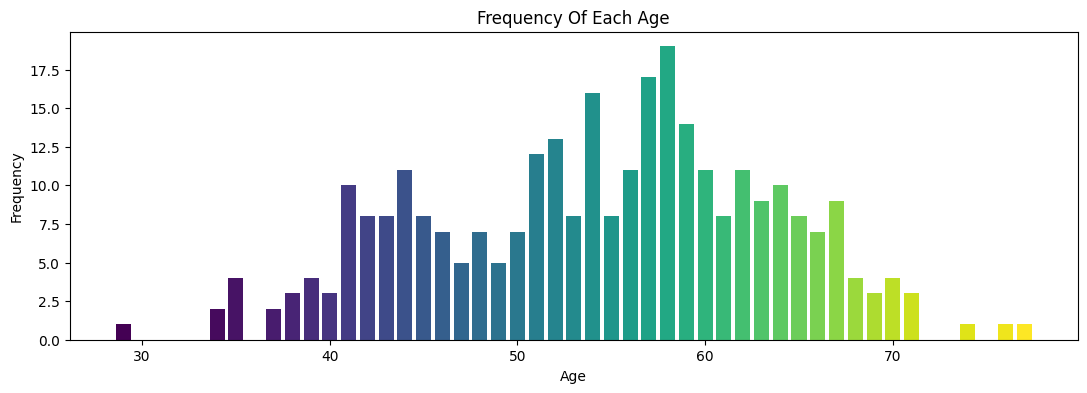

In [ ]:
plt.figure(figsize=(13,4))
age_counts = df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(age_counts))))
plt.title('Frequency Of Each Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

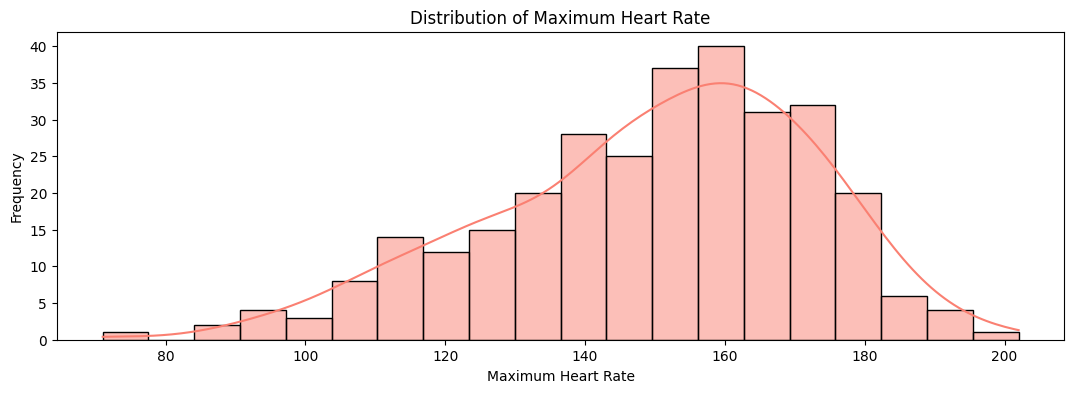

In [ ]:
plt.figure(figsize=(13,4))
sns.histplot(df['Maximum_Heart_Rate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

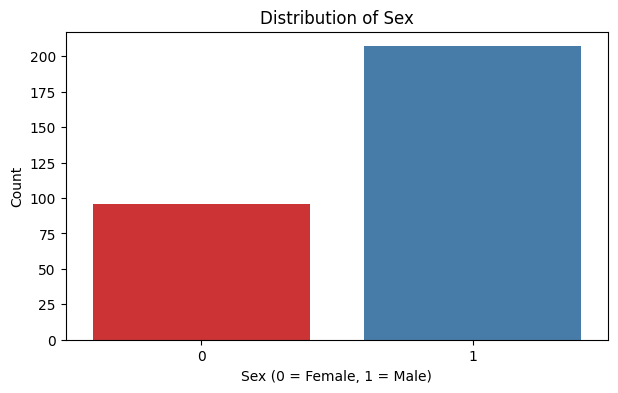

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

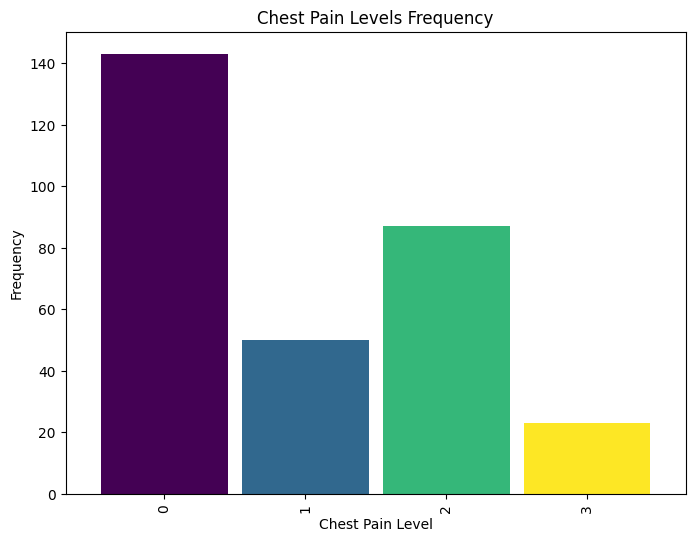

In [ ]:
plt.figure(figsize=(8, 6))
chest_pain_counts = df['Chest_Pain'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(chest_pain_counts)))
ax = chest_pain_counts.plot(kind='bar', width=0.9, color=colors)
ax.set_title('Chest Pain Levels Frequency')
ax.set_xlabel('Chest Pain Level')
ax.set_ylabel('Frequency')
plt.show()

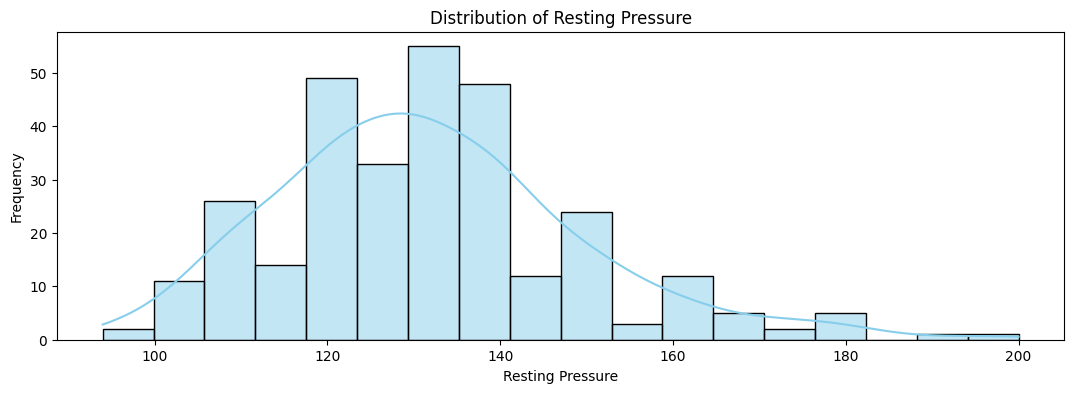

In [ ]:
plt.figure(figsize=(13, 4))
sns.histplot(df['Resting_Pressure'], kde=True, color='skyblue')
plt.title('Distribution of Resting Pressure')
plt.xlabel('Resting Pressure')
plt.ylabel('Frequency')
plt.show()

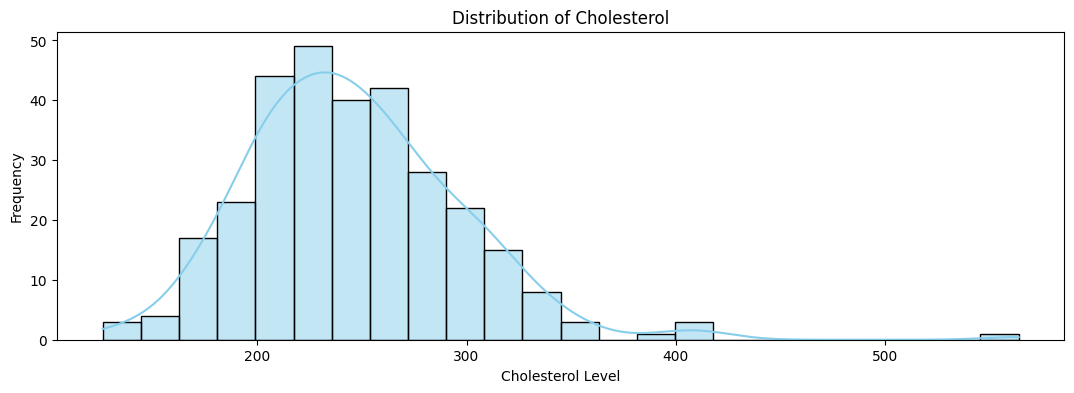

In [ ]:
plt.figure(figsize=(13, 4))
sns.histplot(df['Cholesterol'], kde=True, color='skyblue')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix

<Axes: >

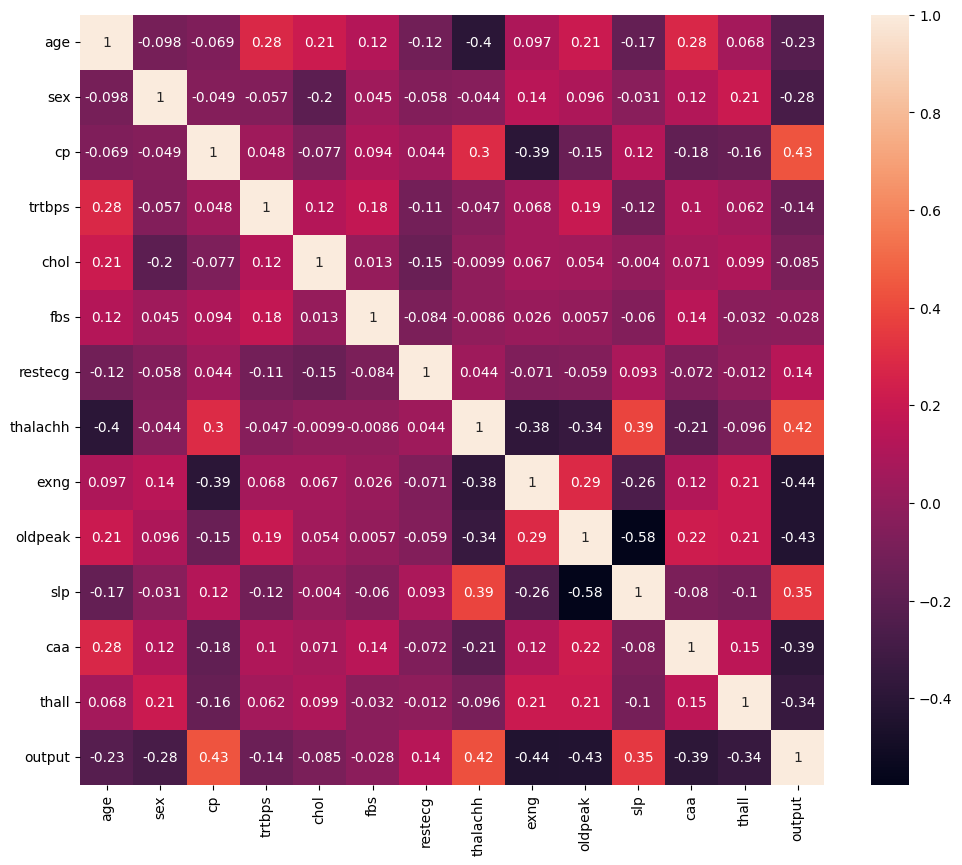

In [ ]:
df = pd.read_csv("heart.csv")
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

## features & target

In [ ]:
x = df.drop(columns=['Target'])
y = df['Target']

In [ ]:
x.shape

(303, 13)

In [ ]:
y.shape

(303,)

## data scaling

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## data spliting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

# RandomForest model

Random Forest adalah metode klasifikasi machine learning yang menggunakan pembelajaran ansambel, yaitu teknik yang menggabungkan banyak pengklasifikasi untuk memberikan solusi terhadap masalah yang kompleks.

Algoritma Random Forest terdiri dari banyak Decision Tree. 'Hutan' yang dihasilkan oleh algoritma Random Forest dilatih melalui "bagging" atau agregasi bootstrap. Bagging adalah meta-algoritma ansambel yang meningkatkan akurasi algoritma pembelajaran mesin.

Algoritma ini menetapkan hasil berdasarkan prediksi Decision Tree. Prediksi dilakukan dengan mengambil rata-rata atau rata-rata keluaran dari berbagai hasil Decision Tree. Menambah jumlah pohon akan meningkatkan ketepatan hasilnya.

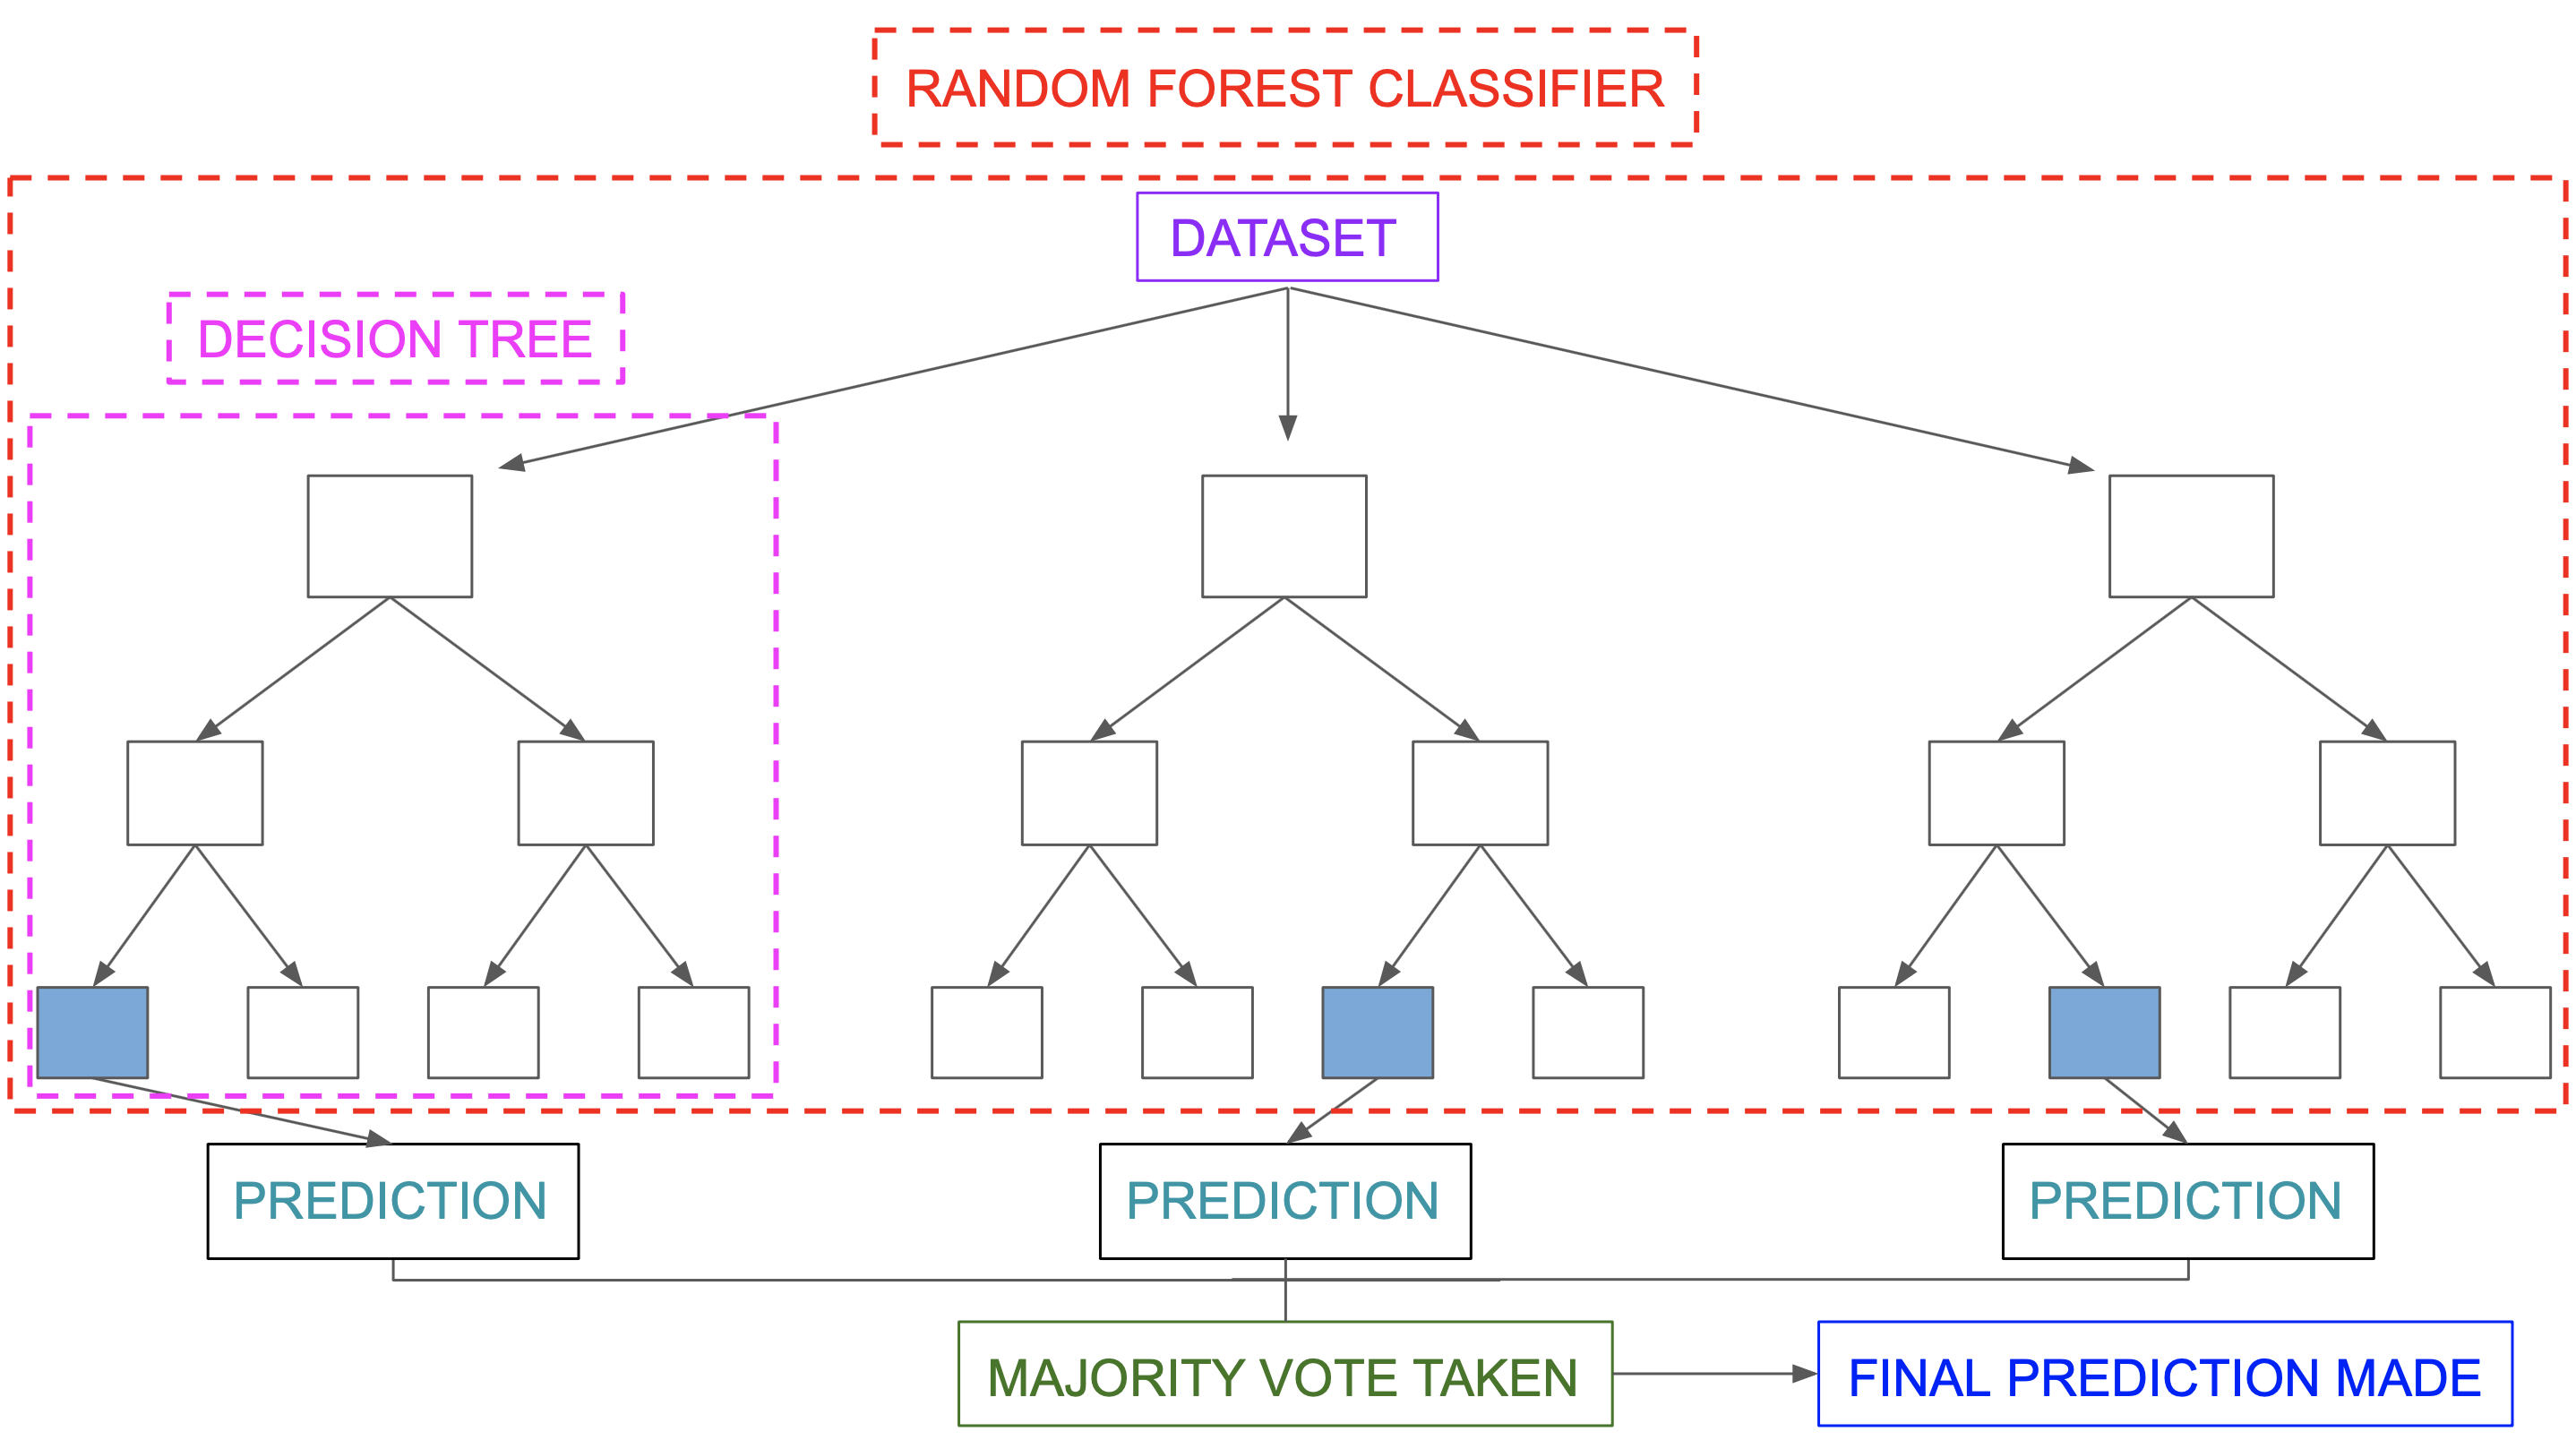

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_rf_model = accuracy_score(y_test, y_pred)
accuracy_rf_model

0.8688524590163934

# confusion_matrix

A confusion matrix is a valuable tool in machine learning for evaluating the performance of classification models. It provides a clear picture of how well your model is classifying data points into different categories.

In [ ]:
#confusion_matrix to know Accuracy of model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  5],
       [ 3, 29]])

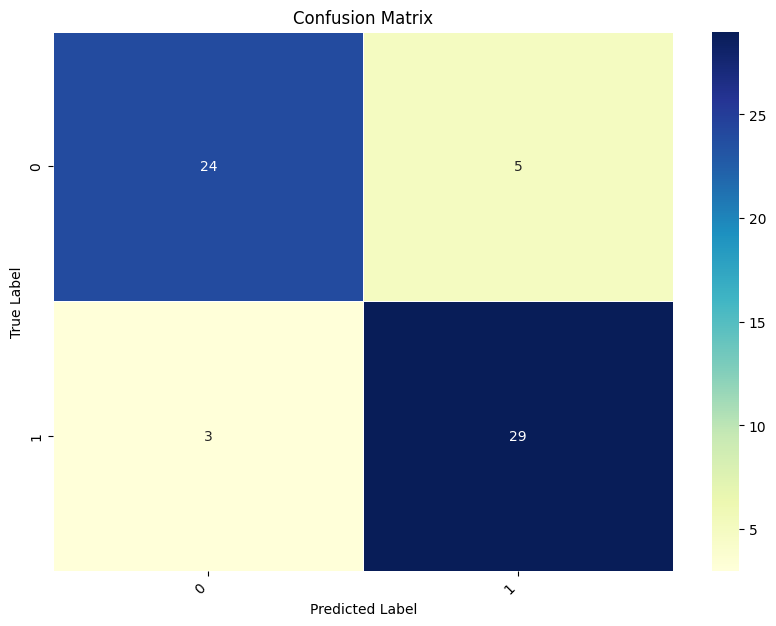

In [ ]:
# visualizations confusion_matrix
import seaborn as sn

plt.figure(figsize=(10, 7))

# Generate a heatmap using Seaborn with customizations for readability
sns.heatmap(cm, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)  # Adjust 'cmap' for best visualization

# Set informative axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Rotate x-axis labels for better readability, especially with many classes
plt.xticks(rotation=45, ha='right')  # Experiment with 'rotation' and 'ha' values

# Add a title to provide context
plt.title('Confusion Matrix')

# Show the plot
plt.show()

FP

In [ ]:
my_data = [
    [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],
    [67, 1, 0, 160, 286, 0, 0, 108, 1, 1.5, 1, 3, 2]
]
rf_model.predict(my_data)
my_data

[[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],
 [67, 1, 0, 160, 286, 0, 0, 108, 1, 1.5, 1, 3, 2]]

# Save Model

In [ ]:
from joblib import Parallel, delayed
import joblib


joblib.dump(rf_model, 'model_Heart Attack_ RandomForest.pkl')

['model_Heart Attack_ RandomForest.pkl']